In [2]:
import numpy as np
import yt
import glob
from yt.funcs import mylog
mylog.setLevel(40)
import matplotlib.pyplot as plt

# assign units to yt

units_override = {"length_unit": (1.0, 'cm'), 
                 "time_unit": (1.0,"s"), 
                 "mass_unit": (1.0,"g")}

# Remove those pesky warnings

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

# These are for making the plots dark mode :) just comment them out if you don't want them

###plt.style.use('dark_background')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 22

/home/cwalli248/anaconda3/lib/python3.8/_collections_abc.py:666: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


# Basics

### Import Single Data File

In [22]:
ds = yt.load("../RUN3-b/kh-slip.out2.00000.athdf")  #yt.load takes path to hdf5 output file as argument

#### We can showcase what fields we have available at our disposal

In [23]:
ds.field_list #variables native to Athena++

[('athena_pp', 'Bcc1'),
 ('athena_pp', 'Bcc2'),
 ('athena_pp', 'Bcc3'),
 ('athena_pp', 'press'),
 ('athena_pp', 'rho'),
 ('athena_pp', 'vel1'),
 ('athena_pp', 'vel2'),
 ('athena_pp', 'vel3')]

In [24]:
ds.derived_field_list #variables derived by yt from native Athena++ variables

[('athena_pp', 'Bcc1'),
 ('athena_pp', 'Bcc2'),
 ('athena_pp', 'Bcc3'),
 ('athena_pp', 'cell_volume'),
 ('athena_pp', 'dx'),
 ('athena_pp', 'dy'),
 ('athena_pp', 'dz'),
 ('athena_pp', 'path_element_x'),
 ('athena_pp', 'path_element_y'),
 ('athena_pp', 'path_element_z'),
 ('athena_pp', 'press'),
 ('athena_pp', 'rho'),
 ('athena_pp', 'vel1'),
 ('athena_pp', 'vel2'),
 ('athena_pp', 'vel3'),
 ('athena_pp', 'vertex_x'),
 ('athena_pp', 'vertex_y'),
 ('athena_pp', 'vertex_z'),
 ('athena_pp', 'x'),
 ('athena_pp', 'y'),
 ('athena_pp', 'z'),
 ('gas', 'H_nuclei_density'),
 ('gas', 'He_nuclei_density'),
 ('gas', 'alfven_speed'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 

### Plot Data File


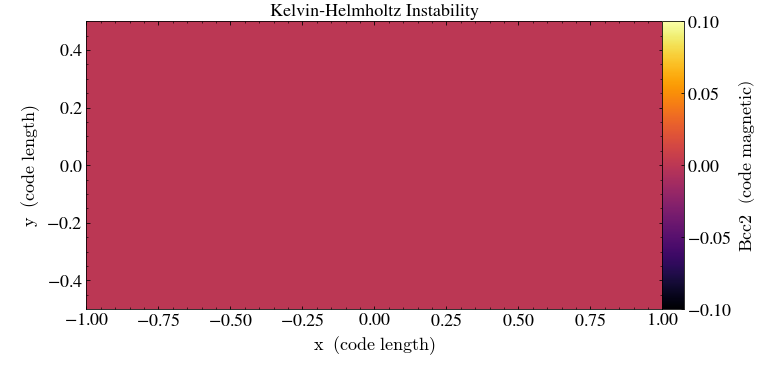

In [25]:
#yt.plot_2d takes data set argument and data set field argument
plot = yt.plot_2d(ds, "Bcc2")
plot.annotate_title("Kelvin-Helmholtz Instability")
plot.set_cmap('Bcc2', "inferno")
# plot.set_unit('Bcc1', 'g/cm**3')
plot.set_axes_unit('cm')
plot.show()

# Analysis

Great we can look at data... but how do we gain useful info from this? 

First lets load all simulation files into the notebook in a list called `ds_all` which stores
all the data sim slices (a bunch of `ds`'s)

In [84]:
# Load in all data files
import glob # this library allows us to pull in lots of files automatically

alldatafiles = glob.glob("../RUN1/kh-slip.out2.*.athdf") 
#glob.glob grabs all files of format given by string argument where * is a wildcard
alldatafiles.sort() #put files in order
print(len(alldatafiles)-1)

ds_all = [] #create empty array
for i, file in enumerate(alldatafiles): #enumerate through all files in alldatafiles array
    ytobj = yt.load(file,units_override=units_override) #load each file using yt.load
    ds_all.append(ytobj) #append data set to ds_all array
print("Loading a Success")


50
Loading a Success


We can index this list, where the index is basically each frame. We use this just like a normal `ds`


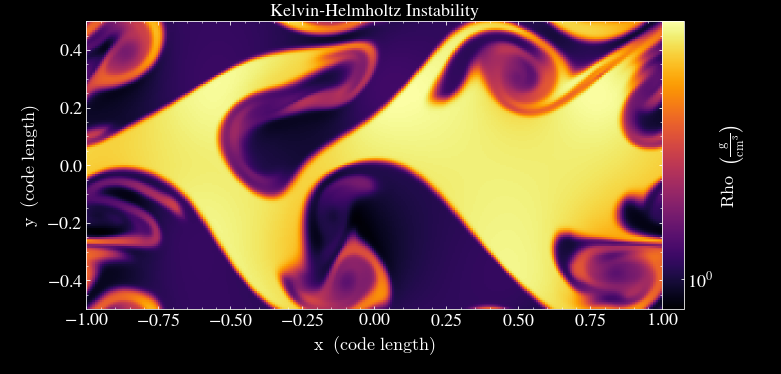

The possible fields are


[('athena_pp', 'press'),
 ('athena_pp', 'rho'),
 ('athena_pp', 'vel1'),
 ('athena_pp', 'vel2'),
 ('athena_pp', 'vel3')]

In [85]:
#plot data, try changing the index of ds_all
plot = yt.plot_2d(ds_all[40], "rho")
plot.annotate_title("Kelvin-Helmholtz Instability")
plot.set_cmap('rho', "inferno")
plot.set_unit('rho', 'g/cm**3')
plot.set_axes_unit('cm')
plot.show()


print("The possible fields are")
ds_all[0].field_list

In [86]:
# construct an array of the mean rho for each frame of the sim (this is just a list comprehension)
rhos = np.array([np.mean(ds_all[i].r["rho"]) for i in range(len(ds_all))])


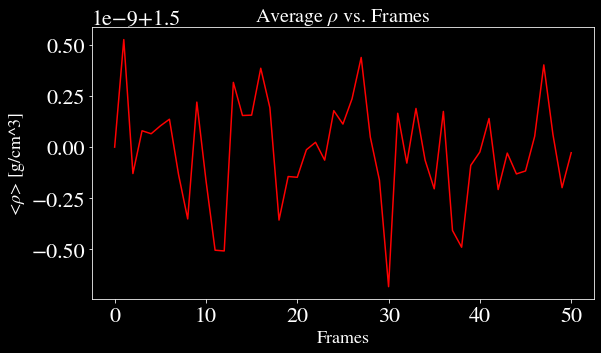

In [87]:
frame_nums = np.arange(0,51,1)

plt.figure(figsize=(9,5))
plt.title("Average $\\rho$ vs. Frames",fontsize=20)
plt.xlabel("Frames",fontsize=18)
plt.ylabel("<$\\rho$> [g/cm^3]",fontsize=18)
plt.plot(frame_nums, rhos, color='red')
#plt.savefig('Average_rho.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

## Exercise 1:

Repeat this process for the other 4 fields available!


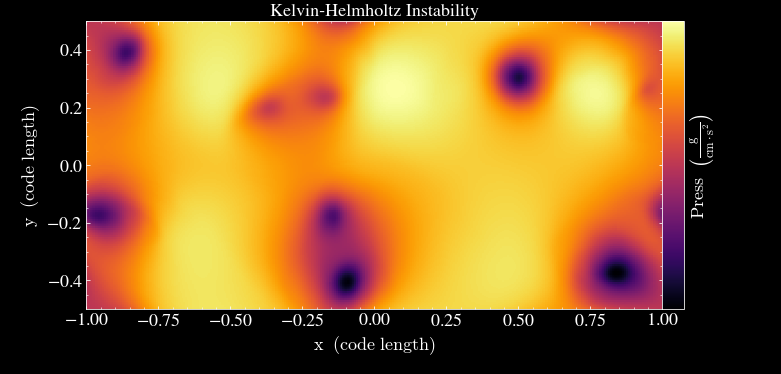

In [88]:
plot = yt.plot_2d(ds_all[40], "press")
plot.annotate_title("Kelvin-Helmholtz Instability")
plot.set_cmap('press', "inferno")
plot.set_unit('press', 'g/(cm*(s**2)) ')
plot.set_axes_unit('cm')
plot.show()

In [89]:
press = np.array([np.mean(ds_all[i].r["press"]) for i in range(len(ds_all))])

print(press)

[2.5        2.50003285 2.5000515  2.50006634 2.5000796  2.50009155
 2.50010263 2.50011265 2.50012288 2.50013334 2.50014391 2.50015593
 2.50017075 2.50018796 2.50020964 2.50023914 2.50028351 2.50034982
 2.50044534 2.50057355 2.50074437 2.50096648 2.50123954 2.50154924
 2.50190129 2.50228012 2.50266417 2.50304485 2.50343003 2.50382293
 2.5042242  2.50459724 2.50494369 2.50528312 2.50560879 2.50589455
 2.50612464 2.50634436 2.50641823 2.50645739 2.50667314 2.50681678
 2.50683505 2.50695011 2.50715901 2.50739297 2.50769117 2.50794804
 2.50791411 2.50789008 2.50796129]


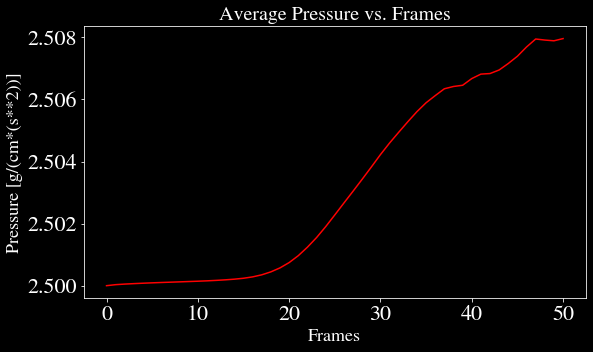

In [90]:
frame_nums = np.arange(0,51,1)

plt.figure(figsize=(9,5))
plt.title("Average Pressure vs. Frames",fontsize=20)
plt.xlabel("Frames",fontsize=18)
plt.ylabel("Pressure [g/(cm*(s**2))]",fontsize=18)
plt.plot(frame_nums, press, color='red')
#plt.savefig('Average_rho.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [91]:
vel1 = np.array([np.mean(ds_all[i].r["vel1"]) for i in range(len(ds_all))])

print(vel1)

[ 1.27894054e-06 -6.12531730e-05 -1.10168106e-04 -1.47662422e-04
 -1.84178117e-04 -2.18548907e-04 -2.42741396e-04 -2.60979058e-04
 -2.84481102e-04 -3.11135607e-04 -3.39703643e-04 -3.74855434e-04
 -4.13428310e-04 -4.50767895e-04 -5.00041057e-04 -5.73601533e-04
 -6.86292148e-04 -8.79328061e-04 -1.20311544e-03 -1.72045919e-03
 -2.55649849e-03 -3.90084294e-03 -5.96536334e-03 -8.85719352e-03
 -1.27896987e-02 -1.78654665e-02 -2.39251716e-02 -3.08860191e-02
 -3.87349444e-02 -4.72781332e-02 -5.64293489e-02 -6.59885263e-02
 -7.63627308e-02 -8.69650958e-02 -9.77540508e-02 -1.08617318e-01
 -1.18919998e-01 -1.27543494e-01 -1.34735686e-01 -1.40984886e-01
 -1.46705801e-01 -1.52260725e-01 -1.57251179e-01 -1.60800086e-01
 -1.63190580e-01 -1.65759856e-01 -1.67660937e-01 -1.67294391e-01
 -1.65341990e-01 -1.63996461e-01 -1.64142818e-01]



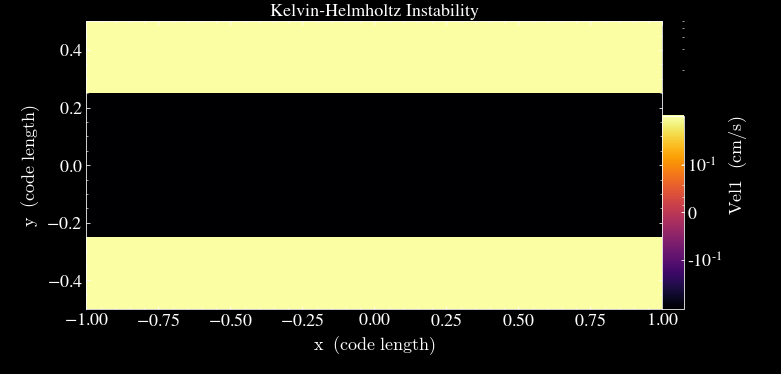

In [99]:
plot = yt.plot_2d(ds_all[0], "vel1")
plot.annotate_title("Kelvin-Helmholtz Instability")
plot.set_cmap('vel1', "inferno")
plot.set_unit('vel1', 'cm/s')
plot.set_axes_unit('cm')
plot.show()

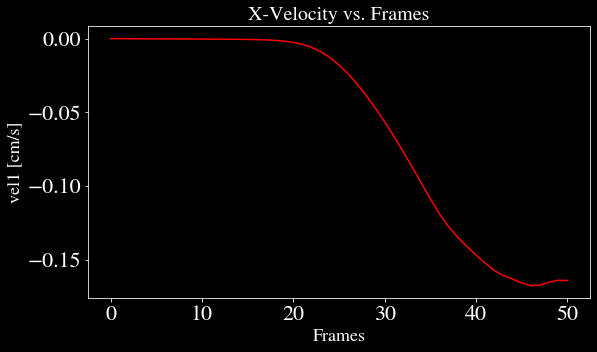

In [93]:
frame_nums = np.arange(0,51,1)

plt.figure(figsize=(9,5))
plt.title("X-Velocity vs. Frames",fontsize=20)
plt.xlabel("Frames",fontsize=18)
plt.ylabel("vel1 [cm/s]",fontsize=18)
plt.plot(frame_nums, vel1, color='red')
#plt.savefig('Average_rho.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [94]:
vel2 = np.array([np.mean(ds_all[i].r["vel2"]) for i in range(len(ds_all))])

print(vel2)

[ 1.61453805e-05  1.74269511e-05  2.42233596e-05  2.42461494e-05
  2.68400807e-05  1.88669522e-05  1.76435757e-05  1.74012473e-05
  2.27871667e-05  2.74127790e-05  2.48976872e-05  2.21529605e-05
  1.77453188e-05  1.74889490e-05  2.22457124e-05  2.84923252e-05
  2.75514240e-05  1.96867865e-05 -1.15179198e-05 -8.01532883e-05
 -2.10466780e-04 -3.99619901e-04 -6.25478922e-04 -8.44189600e-04
 -1.08237989e-03 -1.33703241e-03 -1.55705325e-03 -1.76883404e-03
 -1.90353765e-03 -1.86658122e-03 -1.83149897e-03 -1.94697767e-03
 -1.86703735e-03 -7.34118104e-04  1.42213760e-03  3.48597007e-03
  4.37801581e-03  4.01790802e-03  3.88308440e-03  4.92578382e-03
  6.57197216e-03  7.98535912e-03  8.21465351e-03  7.33751241e-03
  5.57138380e-03  3.69466790e-03  2.27190187e-03  1.81832571e-03
  1.92359493e-03  1.67658996e-03  2.41675054e-04]



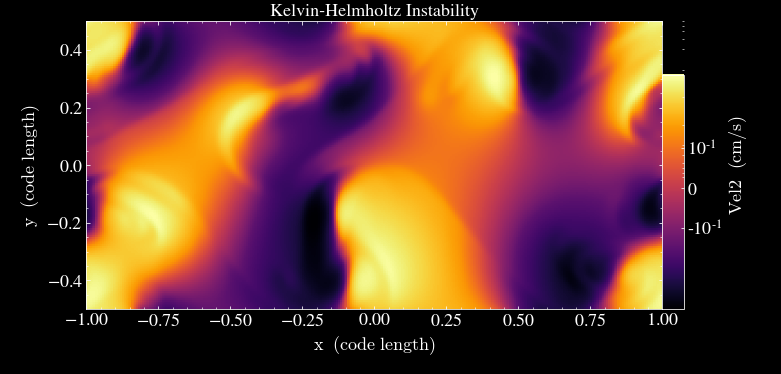

In [95]:
plot = yt.plot_2d(ds_all[40], "vel2")
plot.annotate_title("Kelvin-Helmholtz Instability")
plot.set_cmap('vel2', "inferno")
plot.set_unit('vel2', 'cm/s')
plot.set_axes_unit('cm')
plot.show()

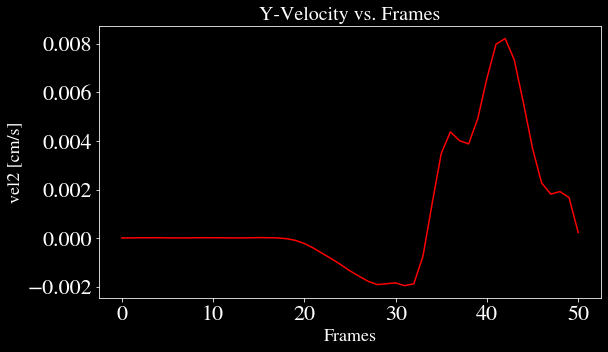

In [96]:
frame_nums = np.arange(0,51,1)

plt.figure(figsize=(9,5))
plt.title("Y-Velocity vs. Frames",fontsize=20)
plt.xlabel("Frames",fontsize=18)
plt.ylabel("vel2 [cm/s]",fontsize=18)
plt.plot(frame_nums, vel2, color='red')
#plt.savefig('Average_rho.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [97]:
vel3 = np.array([np.mean(ds_all[i].r["vel3"]) for i in range(len(ds_all))])

print(vel3)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]



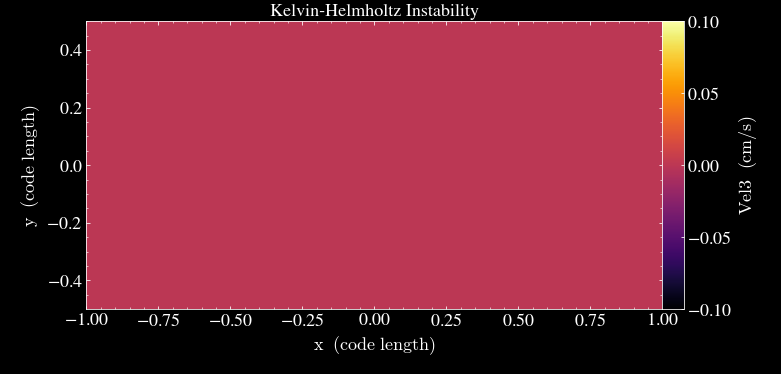

In [98]:
plot = yt.plot_2d(ds_all[40], "vel3")
plot.annotate_title("Kelvin-Helmholtz Instability")
plot.set_cmap('vel3', "inferno")
plot.set_unit('vel3', 'cm/s')
plot.set_axes_unit('cm')
plot.show()

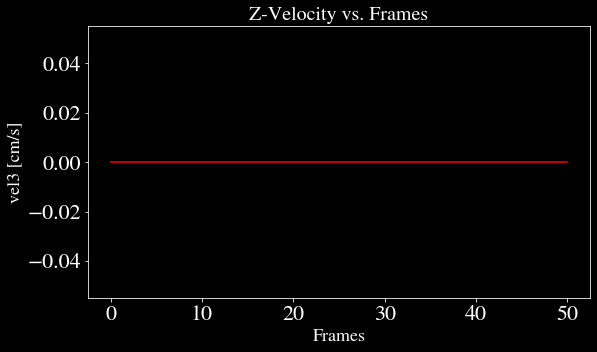

In [63]:
frame_nums = np.arange(0,51,1)

plt.figure(figsize=(9,5))
plt.title("Z-Velocity vs. Frames",fontsize=20)
plt.xlabel("Frames",fontsize=18)
plt.ylabel("vel3 [cm/s]",fontsize=18)
plt.plot(frame_nums, vel3, color='red')
#plt.savefig('Average_rho.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [66]:
Bcc1 = np.array([np.mean(ds_all[i].r["Bcc1"]) for i in range(len(ds_all))])

print(Bcc1)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2.]


In [75]:
plot = yt.plot_2d(ds_all[40], "Bcc1")
plot.annotate_title("Kelvin-Helmholtz Instability")
plot.set_cmap('Bcc1', "inferno")
plot.set_unit('Bcc1', 'to_equivalent(g/(A*s**2), SI')
plot.set_axes_unit('cm')
plot.show()

TokenError: ('EOF in multi-line statement', (2, 0))

In [ ]:
frame_nums = np.arange(0,51,1)

plt.figure(figsize=(9,5))
plt.title("Z-Velocity vs. Frames",fontsize=20)
plt.xlabel("Frames",fontsize=18)
plt.ylabel("vel3 [cm/s]",fontsize=18)
plt.plot(frame_nums, vel3, color='red')
#plt.savefig('Average_rho.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [77]:
print(to_equivalent '(g/(A*s**2), SI')

SyntaxError: invalid syntax (<ipython-input-77-56cd00f8ba0f>, line 1)

### Probability Density Function (PDF)

An easy way to see the distribution of your data!

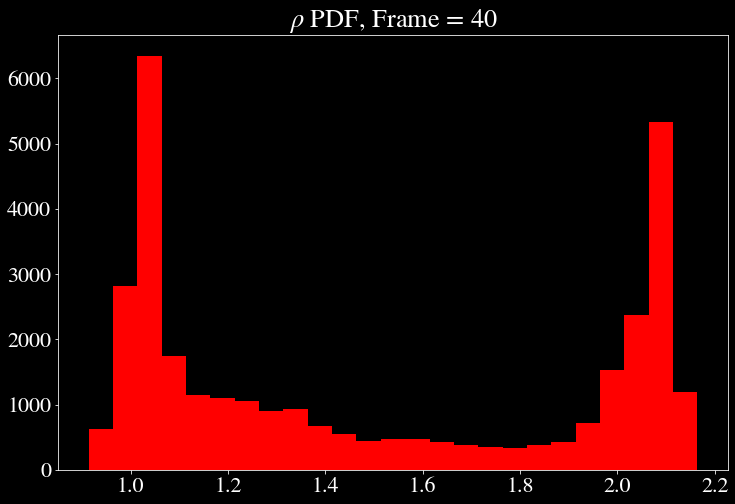

In [102]:
frame_num = 40

plt.figure(figsize=(12,8))
plt.title("$\\rho$ PDF, Frame = " + str(frame_num))
plt.hist(np.array(ds_all[frame_num].r["rho"]),bins=25,  color='red')
plt.show()

## Exercise 2:

Try figuring out how to animate this plot so that it plays through each frame plotting the PDF. 
This will allow us to see exactly how the distribution of density is evolving!

NameError: name 'animation' is not defined

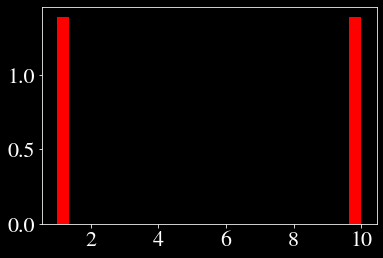

In [83]:
def update_hist():
    plt.cla()
    plt.hist(np.array(ds_all[frame_num].r["rho"]),bins=25, density=True, color='red')

fig = plt.figure()
hist = plt.hist(np.array(ds_all[0].r["rho"]),bins=25, density=True, color='red')

animation = animation.FuncAnimation(fig, update_hist, init_func=hist, frames=200, interval=20, blit=True) 
plt.show()